Exploratory Data Analysis

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_ind=df[(df['job_country']=='India') & (df['job_title_short']=='Data Scientist')]
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13279 entries, 19 to 785697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        13279 non-null  object        
 1   job_title              13279 non-null  object        
 2   job_location           13279 non-null  object        
 3   job_via                13279 non-null  object        
 4   job_schedule_type      13244 non-null  object        
 5   job_work_from_home     13279 non-null  bool          
 6   search_location        13279 non-null  object        
 7   job_posted_date        13279 non-null  datetime64[ns]
 8   job_no_degree_mention  13279 non-null  bool          
 9   job_health_insurance   13279 non-null  bool          
 10  job_country            13279 non-null  object        
 11  salary_rate            93 non-null     object        
 12  salary_year_avg        92 non-null     float64       
 13  sala

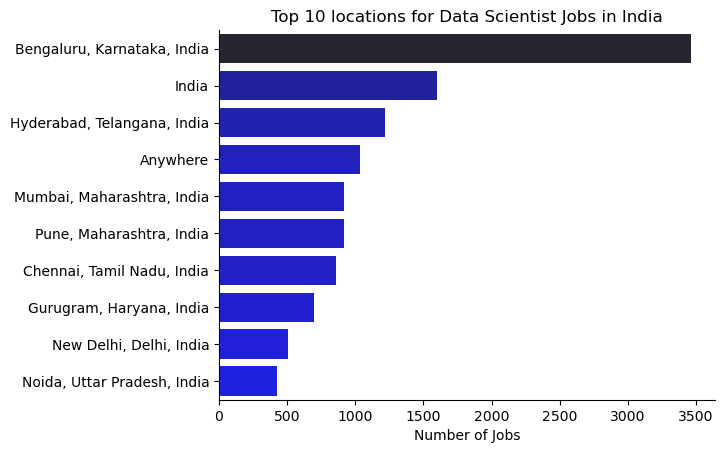

In [13]:
df_plot=df_ind['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 locations for Data Scientist Jobs in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

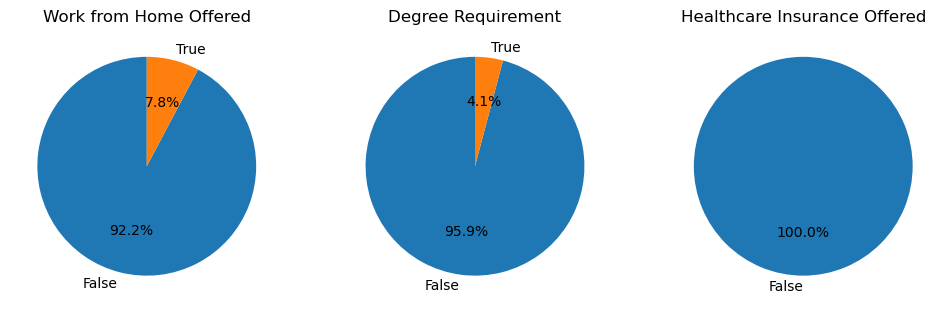

In [19]:
dict_column= {
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Healthcare Insurance Offered'
}

fig, ax= plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_ind[column].value_counts()
    labels = [str(x) for x in value_counts.index]  # Convert the index to string labels
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

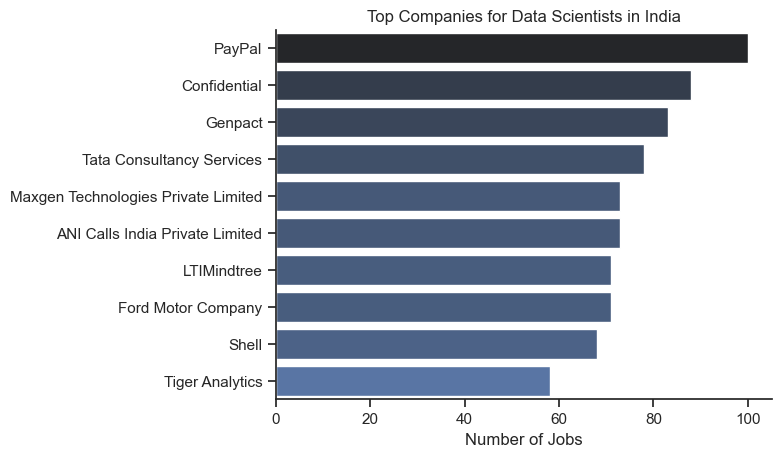

In [21]:
df_plot=df_ind['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top Companies for Data Scientists in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()